# Movie Recommendations with Document Similarity

Recommender systems are one of the popular and most adopted applications of machine learning. They are typically used to recommend entities to users and these entites can be anything like products, movies, services and so on.

Popular examples of recommendations include,

- Amazon suggesting products on its website
- Amazon Prime, Netflix, Hotstar recommending movies\shows
- YouTube recommending videos to watch

Typically recommender systems can be implemented in three ways:

- Simple Rule-based Recommenders: Typically based on specific global metrics and thresholds like movie popularity, global ratings etc.
- Content-based Recommenders: This is based on providing similar entities based on a specific entity of interest. Content metadata can be used here like movie descriptions, genre, cast, director and so on
- Collaborative filtering Recommenders: Here we don't need metadata but we try to predict recommendations and ratings based on past ratings of different users and specific items.

Since our focus in not really recommendation engines but NLP, we will be leveraging the text-based metadata for each movie to try and recommend similar movies based on specific movies of interest. This falls under content-based recommenders.

# Install Dependencies

In [1]:
!pip install textsearch
!pip install contractions
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/keiziapurba/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/keiziapurba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load and View Data

In [2]:
import pandas as pd

df = pd.read_csv('https://github.com/dipanjanS/nlp_workshop_dhs18/raw/master/Unit%2010%20-%20Project%208%20-%20Movie%20Recommendations%20with%20Document%20Similarity/tmdb_5000_movies.csv.gz', compression='gzip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [3]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
df = df[['title', 'tagline', 'overview', 'popularity']]
df.tagline.fillna('', inplace=True)
df['description'] = df['tagline'].map(str) + ' ' + df['overview']
df.dropna(inplace=True)
df = df.sort_values(by=['popularity'], ascending=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 546 to 4553
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        4800 non-null   object 
 1   tagline      4800 non-null   object 
 2   overview     4800 non-null   object 
 3   popularity   4800 non-null   float64
 4   description  4800 non-null   object 
dtypes: float64(1), object(4)
memory usage: 225.0+ KB


In [5]:
df.head()

,title,tagline,overview,popularity,description
546,Minions,"Before Gru, they had a history of bad bosses","Minions Stuart, Kevin and Bob are recruited by...",875.581305,"Before Gru, they had a history of bad bosses M..."
95,Interstellar,Mankind was born on Earth. It was never meant ...,Interstellar chronicles the adventures of a gr...,724.247784,Mankind was born on Earth. It was never meant ...
788,Deadpool,Witness the beginning of a happy ending,Deadpool tells the origin story of former Spec...,514.569956,Witness the beginning of a happy ending Deadpo...
94,Guardians of the Galaxy,All heroes start somewhere.,"Light years from Earth, 26 years after being a...",481.098624,All heroes start somewhere. Light years from E...
127,Mad Max: Fury Road,What a Lovely Day.,An apocalyptic story set in the furthest reach...,434.278564,What a Lovely Day. An apocalyptic story set in...


# Build a Movie Recommender System

Here you will build your own movie recommender system. We will use the following pipeline:

- Text pre-processing
- Feature Engineering
- Document Similarity Computation
- Find top similar movies
- Build a movie recommendation function

## Document Similarity

Recommendations are about understanding the underlying features which make us favour one choice over the other. Similarity between items(in this case movies) is one way to understanding why we choose one movie over another. There are different ways to calculate similarity between two items. One of the most widely used measures is **cosine similarity** which we have already used in the previous unit.

### Cosine Similarity

Cosine Similarity is used to calculate a numeric score to denote the similarity between two text documents. Mathematically, it is defined as follows:

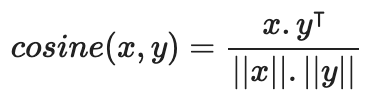

In [6]:
import nltk
import re
import numpy as np
import contractions

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    doc = contractions.fix(doc)
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    #filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(list(df['description']))
len(norm_corpus)

4800

## Extract TF-IDF Features

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(ngram_range=(1, 2), min_df=2)
tfidf_matrix = tf.fit_transform(norm_corpus)
tfidf_matrix.shape

(4800, 20471)

## Compute Pairwise Document Similarity

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

doc_sim = cosine_similarity(tfidf_matrix)
doc_sim_df = pd.DataFrame(doc_sim)
doc_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4790,4791,4792,4793,4794,4795,4796,4797,4798,4799
0,1.000000,0.000000,0.000000,0.000000,0.006071,0.008067,0.0,0.000000,0.0,0.000000,...,0.018758,0.000000,0.037930,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.009646
1,0.000000,1.000000,0.000000,0.017839,0.007968,0.000000,0.0,0.012501,0.0,0.014840,...,0.000000,0.000000,0.017564,0.0,0.019152,0.000000,0.000000,0.000000,0.000000,0.007963
2,0.000000,0.000000,1.000000,0.000000,0.017178,0.000000,0.0,0.000000,0.0,0.024326,...,0.000000,0.006903,0.005024,0.0,0.012893,0.000000,0.025975,0.000000,0.027126,0.009340
3,0.000000,0.017839,0.000000,1.000000,0.000000,0.022414,0.0,0.000000,0.0,0.037207,...,0.000000,0.060846,0.025039,0.0,0.036237,0.030516,0.022605,0.000000,0.000000,0.000000
4,0.006071,0.007968,0.017178,0.000000,1.000000,0.004673,0.0,0.064581,0.0,0.000000,...,0.022064,0.019662,0.036561,0.0,0.015826,0.000000,0.076033,0.004516,0.043475,0.011465


## Get List of Movie Titles

In [9]:
movies_list = df['title'].values
movies_list, movies_list.shape

(array(['Minions', 'Interstellar', 'Deadpool', ..., 'Penitentiary',
        'Alien Zone', 'America Is Still the Place'], dtype=object),
 (4800,))

## Find Top Similar Movies for a Sample Movie

Let's take **Minions** the most popular movie the the dataframe above and try and find the most similar movies which can be recommended

### Find movie ID

In [10]:
movie_idx = np.where(movies_list == 'Minions')[0][0]
movie_idx

0

### Get movie similarities

In [11]:
movie_similarities = doc_sim_df.iloc[movie_idx].values
movie_similarities

array([1.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.00964646])

### Get top 5 similar movie IDs

In [12]:
similar_movie_idxs = np.argsort(-movie_similarities)[1:6]
similar_movie_idxs

array([ 33,  60, 737, 490, 298])

### Get top 5 similar movies

In [13]:
similar_movies = movies_list[similar_movie_idxs]
similar_movies

array(['Despicable Me 2', 'Despicable Me',
       'Teenage Mutant Ninja Turtles: Out of the Shadows', 'Superman',
       'Rise of the Guardians'], dtype=object)

### Build a movie recommender function to recommend top 5 similar movies for any movie

The movie title, movie title list and document similarity matrix dataframe will be given as inputs to the function

In [14]:
def movie_recommender(movie_title, movies=movies_list, doc_sims=doc_sim_df):
    # find movie id
    movie_idx = np.where(movies == movie_title)[0][0]
    # get movie similarities
    movie_similarities = doc_sims.iloc[movie_idx].values
    # get top 5 similar movie IDs
    similar_movie_idxs = np.argsort(-movie_similarities)[1:6]
    # get top 5 movies
    similar_movies = movies[similar_movie_idxs]
    # return the top 5 movies
    return similar_movies

## Get popular Movie Recommendations

In [15]:
popular_movies = ['Minions', 'Interstellar', 'Deadpool', 'Jurassic World', 'Pirates of the Caribbean: The Curse of the Black Pearl',
              'Dawn of the Planet of the Apes', 'The Hunger Games: Mockingjay - Part 1', 'Terminator Genisys', 
              'Captain America: Civil War', 'The Dark Knight', 'The Martian', 'Batman v Superman: Dawn of Justice', 
              'Pulp Fiction', 'The Godfather', 'The Shawshank Redemption', 'The Lord of the Rings: The Fellowship of the Ring',  
              'Harry Potter and the Chamber of Secrets', 'Star Wars', 'The Hobbit: The Battle of the Five Armies',
              'Iron Man']

In [16]:
for movie in popular_movies:
    print('Movie:', movie)
    print('Top 5 recommended Movies:', movie_recommender(movie_title=movie, movies=movies_list, doc_sims=doc_sim_df))
    print()

Movie: Minions
Top 5 recommended Movies: ['Despicable Me 2' 'Despicable Me'
 'Teenage Mutant Ninja Turtles: Out of the Shadows' 'Superman'
 'Rise of the Guardians']

Movie: Interstellar
Top 5 recommended Movies: ['Gattaca' 'Space Pirate Captain Harlock' 'Space Cowboys'
 'Starship Troopers' 'Final Destination 2']

Movie: Deadpool
Top 5 recommended Movies: ['Silent Trigger' 'Underworld: Evolution' 'Bronson' 'Shaft' 'Don Jon']

Movie: Jurassic World
Top 5 recommended Movies: ['Jurassic Park' 'The Lost World: Jurassic Park'
 "National Lampoon's Vacation" 'The Nut Job' 'Vacation']

Movie: Pirates of the Caribbean: The Curse of the Black Pearl
Top 5 recommended Movies: ["Pirates of the Caribbean: Dead Man's Chest"
 'Pirates of the Caribbean: On Stranger Tides' 'The Pirate'
 'The Pirates! In an Adventure with Scientists!' 'Joyful Noise']

Movie: Dawn of the Planet of the Apes
Top 5 recommended Movies: ['Battle for the Planet of the Apes' 'Groove' 'The Other End of the Line'
 'Chicago Overcoat